In [1]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
from utils.dataloader import dataloader
import tensorflow as tf
from cycler import cycler

In [2]:
# there was a bug in the r-squared metric computation, so we have to correct it now

def calculate_r_oos_mask_test(y_true, y_pred,  all_points=False):
    mask = tf.cast(y_true > 0, tf.double)
    
    numerator = tf.reduce_sum(y_true * mask)  
    denominator = tf.reduce_sum(mask )      
    mean_IV = numerator / denominator  

    if not all_points:
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred) * mask)
        ss_tot = tf.reduce_sum(tf.square(y_true - mean_IV) * mask)
        r2 = 1 - ss_res / ss_tot
    else:
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred) * mask, axis=[1, 2])
        ss_tot = tf.reduce_sum(tf.square(y_true - mean_IV) * mask, axis=[1, 2])
        r2 = 1 - ss_res / ss_tot

    return r2.numpy()

In [3]:
# Get best transformer result

folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "_transformerNEWv2"  # the substring to look for
step = "h_1"
option = 'put'

lowest_value = float('inf')
lowest_file_short = None
i = 0
for file_name in os.listdir(folder_path):
   
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name and option in file_name:
        i=i+1
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name
                

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")
print(i)


Lowest value: 0.10147856113256758
From file: put_smooth_True_ws_21_h_1_16_32_transformerNEWv2.npy
54


In [4]:
option, _, _, _, ws, _, h_step, num_head, key_dim, _ = lowest_file_short.split("_")

In [5]:
test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")
test_surface = np.load(f"results/test_short_ttm/surface/{lowest_file_short}")
test_surface_pred = np.load(f"results/test_short_ttm/surface_pred/{lowest_file_short}")
transformer_ivrmse_h = np.load(f"results/test_short_ttm/ivrmse_h/{lowest_file_short}")

print(f"h = {h_step} ahead prediction for {option} option:")
print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
print(f"Best hyperparameters: window size {ws}, number of attention heads: {num_head}, key_dim: {key_dim}")
print(f"Corrected R-squared: {calculate_r_oos_mask_test(test_surface, test_surface_pred)}")

h = 1 ahead prediction for put option:
IVRMSE: 0.113, R_oos: 0.970
Best hyperparameters: window size 21, number of attention heads: 16, key_dim: 32
Corrected R-squared: 0.8072441218082774


In [6]:
# Make a weights figure
lowest_file_weights = lowest_file_short.replace("smooth", "sm")
weights = np.load(f"results/attention_weights/short_ttm_{lowest_file_weights}")
print(weights.shape)

(1, 16, 21, 21)


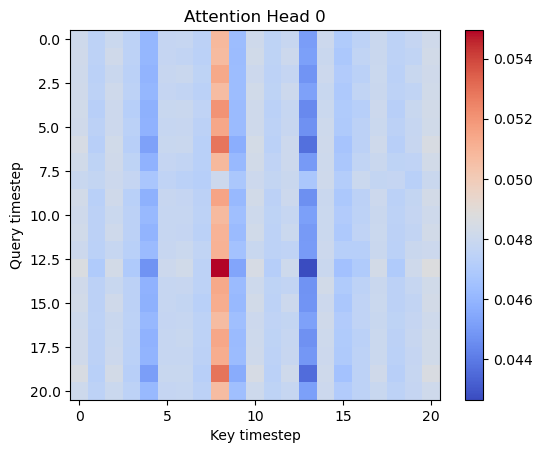

In [7]:
plt.imshow(weights[0,0], cmap='coolwarm')
plt.title("Attention Head 0")
plt.xlabel("Key timestep")
plt.ylabel("Query timestep")
plt.colorbar()
plt.show()

C:\Users\hydra\AppData\Local\Temp\ipykernel_25916\2843041942.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


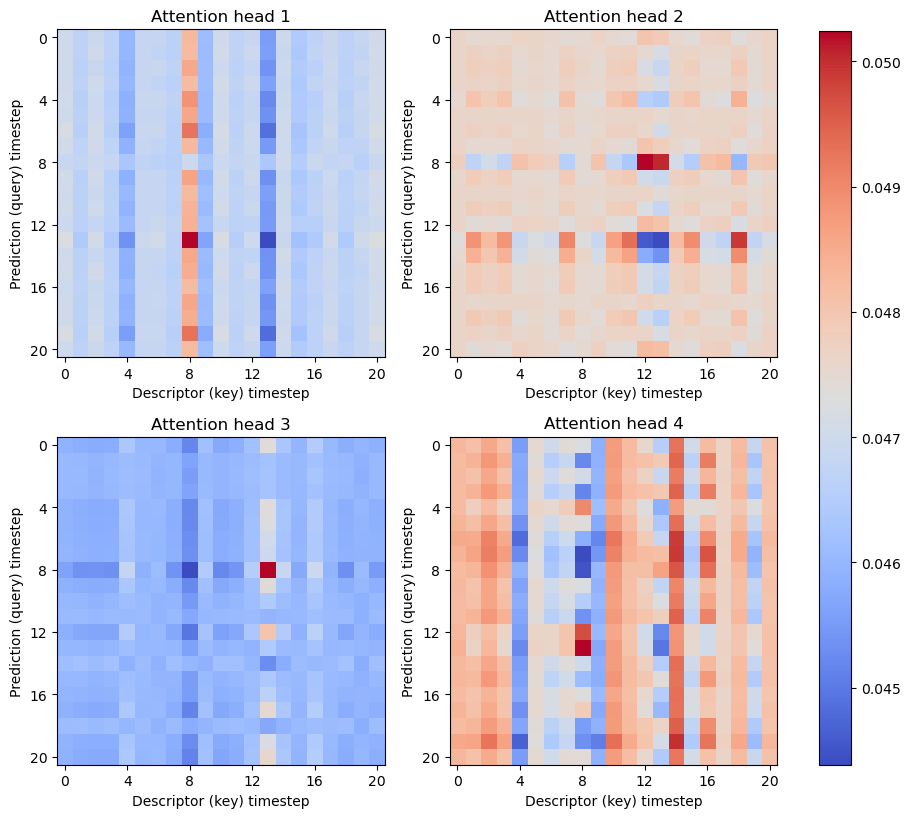

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(8,8.3))

titles = ["Attention head 1", "Attention head 2", "Attention head 3", "Attention head 4"]
idx = 0
for i in range(2):
    for j in range(2):
        im = axs[i, j].imshow(weights[0, idx], cmap='coolwarm')
        axs[i, j].set_title(titles[idx])
        axs[i, j].set_xlabel("Descriptor (key) timestep")
        axs[i, j].set_ylabel("Prediction (query) timestep")

        # 🔢 Set custom ticks
        axs[i, j].set_xticks(range(0, 21, 4))
        axs[i, j].set_yticks(range(0, 21, 4))
        idx += 1

# Adjust space for colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([1.03, 0.07, 0.04, 0.885]) 
fig.colorbar(im, cax=cbar_ax)

plt.tight_layout()
plt.show()


In [9]:
# Get best transformer result

folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "covtransformerNEWv2"  # the substring to look for

lowest_value = float('inf')
lowest_file_short = None
i = 0
for file_name in os.listdir(folder_path):
   
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name and option in file_name:
        i=i+1
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name
                

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")
print(i)


Lowest value: 0.11396643266809836
From file: put_smooth_True_ws_21_h_10_VIX_VVIX_SKEW_RVOL_TMS_CRS_EPU_ADS_4_32_covtransformerNEWv2.npy
54


In [10]:
option, _, _, _, ws, _, h_step, _, _, _, _, _, _, _, _, num_head, key_dim, _ = lowest_file_short.split("_")

In [11]:
test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")
test_surface = np.load(f"results/test_short_ttm/surface/{lowest_file_short}")
test_surface_pred = np.load(f"results/test_short_ttm/surface_pred/{lowest_file_short}")
covtransformer_ivrmse_h = np.load(f"results/test_short_ttm/ivrmse_h/{lowest_file_short}")

print(f"h = {h_step} ahead prediction for {option} option:")
print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
print(f"Best hyperparameters: window size {ws}, number of attention heads: {num_head}, key_dim: {key_dim}")
print(f"Corrected R-squared: {calculate_r_oos_mask_test(test_surface, test_surface_pred)}")

h = 10 ahead prediction for put option:
IVRMSE: 0.141, R_oos: 0.954
Best hyperparameters: window size 21, number of attention heads: 4, key_dim: 32
Corrected R-squared: 0.7053223361483429


In [12]:
folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "_convLSTMNEW"  # the substring to look for

lowest_value = float('inf')
lowest_file_short = None

for file_name in os.listdir(folder_path):
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name and option in file_name:
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")


Lowest value: 0.13733301819488022
From file: put_smooth_True_ws_21_h_1_3_3_4_convLSTMNEW.npy


In [13]:
_, _, smooth, _, ws_short, _, h_short, num_layers_short, k_height_short, k_width_short, _ = lowest_file_short.split("_")

In [14]:
result_short = f"{option}_smooth_{smooth}_ws_{ws_short}_h_{h_short}_{num_layers_short}_{k_height_short}_{k_width_short}{target_substring}.npy"
print(result_short)

put_smooth_True_ws_21_h_1_3_3_4_convLSTMNEW.npy


In [15]:
ivrmse_short = np.load('results/test_short_ttm/ivrmse/' + result_short)
ivrmse_h_short = np.load('results/test_short_ttm/ivrmse_h/' + result_short)
roos_short = np.load('results/test_short_ttm/r_oos/' + result_short)
roos_h_short = np.load('results/test_short_ttm/r_oos_h/' +result_short)
surface_short = np.load('results/test_short_ttm/surface/' + result_short)
surface_pred_short = np.load('results/test_short_ttm/surface_pred/' + result_short)
print(ivrmse_short)
# R squared has not been fixed yet here print(roos_short)
print(calculate_r_oos_mask_test(surface_short, surface_pred_short))
convlstm_ivrmse_h = np.load(f"results/test_short_ttm/ivrmse_h/{lowest_file_short}")


0.22228542168731105
0.2568312018439879


In [16]:
folder_path = "results/validation_short_ttm/ivrmse/"  # change this to your folder path
target_substring = "_covconvLSTMNEW"  # the substring to look for

lowest_value = float('inf')
lowest_file_short = None
i = 0
for file_name in os.listdir(folder_path):
   
    if file_name.endswith('.npy') and target_substring in file_name and step in file_name and option in file_name:
        i=i+1
        file_path = os.path.join(folder_path, file_name)
        try:
            value = np.load(file_path)
            # If the file contains a single number
        
            if value < lowest_value:
                lowest_value = value
                lowest_file_short = file_name
                

        except Exception as e:
            print(f"Error loading {file_name}: {e}")

print(f"Lowest value: {lowest_value}")
print(f"From file: {lowest_file_short}")
print(i)


Lowest value: 0.10157577252409732
From file: put_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_TMS_CRS_EPU_ADS_2_7_4_covconvLSTMNEW.npy
8


In [17]:
option, _, _, _, ws, _, h_step, _, _, _, _, _, _, _,  _, num_head, key_dim, _, _= lowest_file_short.split("_")

In [18]:
test_ivrmse = np.load(f"results/test_short_ttm/ivrmse/{lowest_file_short}")
test_roos = np.load(f"results/test_short_ttm/r_oos/{lowest_file_short}")
test_surface = np.load(f"results/test_short_ttm/surface/{lowest_file_short}")
test_surface_pred = np.load(f"results/test_short_ttm/surface_pred/{lowest_file_short}")
covconvlstm_ivrmse_h = np.load(f"results/test_short_ttm/ivrmse_h/{lowest_file_short}")

print(f"h = {h_step} ahead prediction for {option} option:")
print(f"IVRMSE: {test_ivrmse:.3f}, R_oos: {test_roos:.3f}")
print(f"Best hyperparameters: window size {ws}, num layers: {num_head}, kernel height: {key_dim}")
print(f"Corrected R-squared: {calculate_r_oos_mask_test(test_surface, test_surface_pred)}")

h = 1 ahead prediction for put option:
IVRMSE: 0.133, R_oos: 0.959
Best hyperparameters: window size 21, num layers: 2, kernel height: 7
Corrected R-squared: 0.734981568429429


In [19]:
ahbs_ivrmse_h =  pd.read_csv(f"AHBS_rmse_1_{option}.csv")


In [20]:
ahbs_ivrmse_h = ahbs_ivrmse_h['rmse'].to_numpy()

In [21]:
arrays = [ahbs_ivrmse_h, convlstm_ivrmse_h, covconvlstm_ivrmse_h, transformer_ivrmse_h, covtransformer_ivrmse_h]
labels = ['AHBS', 'ConvLSTM', 'CovConvLSTM', 'Transformer', 'CovTransformer']

min_len = min(a.shape[0] for a in arrays)
arrays = [a.flatten()[-min_len:] for a in arrays]  # Keep last `min_len` values

for i in arrays:
    print(i.shape)

(183,)
(183,)
(183,)
(183,)
(183,)


In [22]:
df_test = pd.read_csv('data/final/evaluation/test_set.csv')
df = df_test.drop_duplicates(subset='date', keep='last')
T = ivrmse_h_short.shape[0]
dates = df['date'].iloc[-T:].reset_index(drop=True)

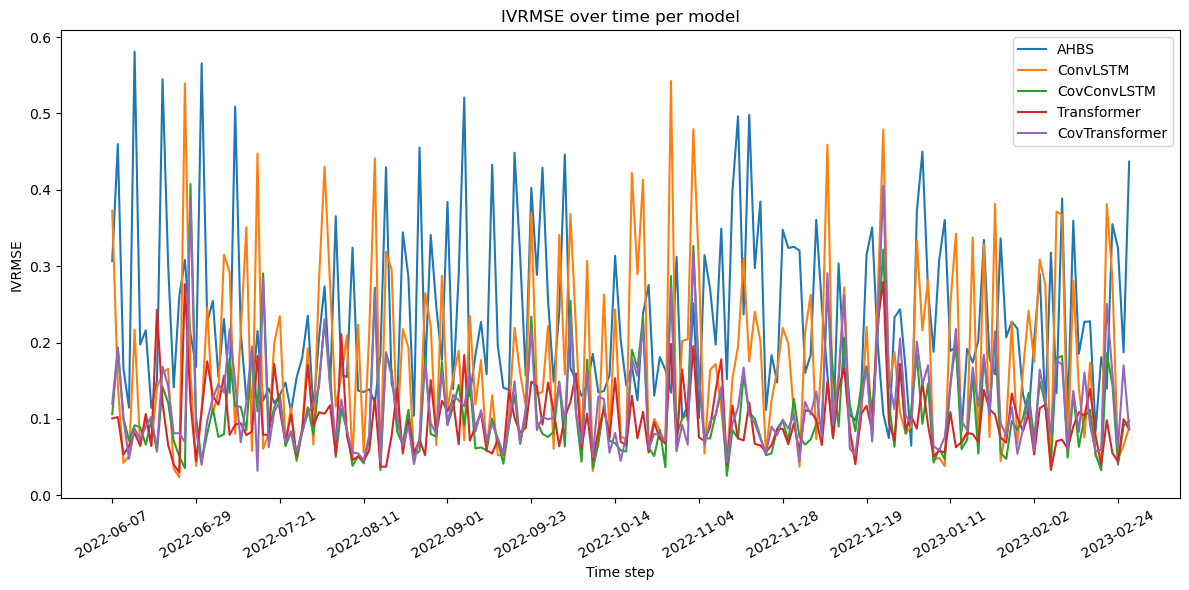

In [23]:
# default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# # Re-assign color cycle
# plt.rcParams['axes.prop_cycle'] = cycler(color=default_colors)

plt.figure(figsize=(12, 6))
dates = dates[-min_len:]
for a, label in zip(arrays, labels):
    plt.plot(dates, a, label=label)

plt.title("IVRMSE over time per model")
plt.xlabel("")
plt.xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
plt.ylabel("IVRMSE")
plt.xlabel("Time step")
plt.legend()
plt.tight_layout()
plt.show()